In [1]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd
import math
%run 1.Sobol_sequence.ipynb

In [2]:
df = pd.read_excel('naca0012.xlsx')

In [3]:
x = df['x']
y = df['y']

In [4]:
df = pd.DataFrame({'x': x, 'y': y})
path = "Deformed_foils\\0rig_NACA0012.dat"
df.to_csv(path, index=False, sep=' ')

In [5]:
# plt.plot(x,y)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Original Airfoil (NACA 0012)')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.grid()

In [6]:
x = df['x'].values
y = df['y'].values

In [7]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [8]:
t_max = 2*max(abs(y))
limit = 0.1*t_max
limit

0.012

In [9]:
num_samples = 128
excel_name = 'design_parmeter.xlsx'
a = get_sobol_samples(limit, num_samples, excel_name, seed=0)
a

0      [0.0084, 0.0104, -0.0033, -0.0033, -0.0086, 0....
1      [-0.0045, -0.0035, 0.0057, 0.0062, 0.0106, -0....
2      [-0.0093, 0.0038, -0.0083, -0.0113, 0.003, -0....
3      [0.0019, -0.0093, 0.0067, 0.0025, -0.0012, 0.0...
4      [0.0045, 0.0017, 0.0026, 0.005, -0.0039, 0.003...
                             ...                        
123    [0.0042, -0.0098, -0.0012, -0.0115, -0.0068, 0...
124    [0.0021, 0.0024, -0.0075, -0.008, -0.0102, 0.0...
125    [-0.009, -0.0077, 0.0074, 0.0052, 0.0062, -0.0...
126    [-0.0042, 0.009, -0.004, -0.0013, 0.0016, -0.0...
127    [0.0086, -0.0019, 0.0049, 0.0103, -0.0058, 0.0...
Length: 128, dtype: object

In [10]:
#inputs
n = 4
w = np.full(n,2) 
xM = [0.2, 0.4, 0.6, 0.8]

In [11]:
def hicks_henne_overall(x_coord, y_coord , n, a, i, w, xM):
    def split_xy(arr):
        half = len(arr)//2
        return arr[:half+1], arr[half+1:]

    x_up, x_low = split_xy(x)
    y_up, y_low = split_xy(y)
    
    a_up = a[i][:n]
    a_low = a[i][n:]

    def hicks_henne(x_coord, y_coord , n, a, w, xM):
        y_deformed = np.array(y_coord)
        for i in range(n):
            ai = a[i]
            xMi = xM[i]
            wi = w[i]
            m = np.log(0.5)/np.log(xMi)
            f = np.sin(np.pi * np.array(x_coord) ** m ) ** wi
            y_deformed += ai * f
            
            x_1 = []
            for j in range(0,1001):
                x_1.append(j/1000)
            f_b = np.sin(np.pi * np.array(x_1) ** m ) ** wi
            
    #         plt.xlabel('X-coordinate')
    #         plt.ylabel('Bump function')
    #         plt.plot(x_1, f_b)
    #         plt.title('Hicks-Henn Bump Function')
    
        return y_deformed 

    
    y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)
    y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)
    y_mod = np.concatenate((y_mod_up, y_mod_low))
    return y_mod



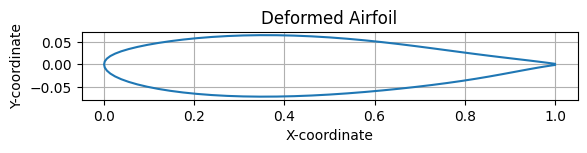

In [12]:
if globals().get('__file__', '') == '':
    i = 10
    y_mod = hicks_henne_overall(x, y , n, a, i, w, xM)
    
    
    plt.plot(x,y_mod)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Deformed Airfoil')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.grid()

In [13]:
def plot_foils(x, y, y_mod):
    plt.plot(x, y, label = "Original Airfoil")
    plt.plot(x, y_mod, label = "Deformed Airfoil")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Original Airfoil vs Deformed Airfoil')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend(loc=(1,1))
    plt.grid()

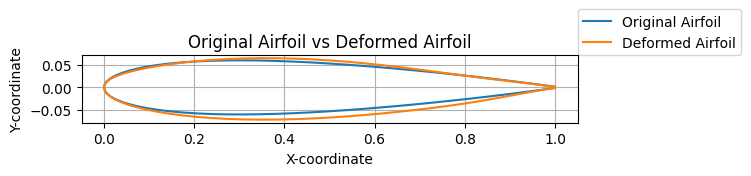

In [14]:
if globals().get('__file__', '') == '':
    plot_foils(x, y, y_mod)

In [19]:
def deformed_foil_generator(x, y, n, a, w, xM, num_samples):
    for i in range(num_samples):
        y_mod = hicks_henne_overall(x, y, n, a, i, w, xM)
        df = pd.DataFrame({'x': x, 'y_modified': y_mod})
        path = "Deformed_foils\\Deformed_airfoil_" + str(i) + ".dat"
        
        df.to_csv(path, index=False, sep=' ')

In [20]:
if globals().get('__file__', '') == '':
    deformed_foil_generator(x, y, n, a, w, xM, num_samples)

In [17]:
# def deformed_foils_plots(x, y, n, a, w, xM, num_samples, save_path):
#     fig, axs = plt.subplots(int(num_samples/2), 2, figsize=(20, 300))
#     axs = axs.flatten()
#     # Plot each dataset
#     for i in range(num_samples):
#         y_mod = hicks_henne_overall(x, y , n, a, i, w, xM)
#         ax = axs[i]
#         ax.plot(x, y)
#         ax.plot(x, y_mod)
#         ax.set_title(f'Dataset {i}')
#         ax.set_aspect('equal', 'box')
#     plt.tight_layout()  
#     if save_path:
#         plt.savefig(save_path, dpi = 150) 
#     plt.show()


In [18]:
# if globals().get('__file__', '') == '':
#     save_path ="Deformed_foils\Deformed_airfoils"
#     deformed_foils_plots(x, y, n, a, w, xM, num_samples, save_path)